In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
import pymysql

In [3]:
import yfinance as yf

/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [4]:
spx = yf.Ticker('^SPX')

In [5]:
spx.info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 4958.61,
 'open': 4957.19,
 'dayLow': 4918.09,
 'dayHigh': 4957.19,
 'regularMarketPreviousClose': 4958.61,
 'regularMarketOpen': 4957.19,
 'regularMarketDayLow': 4918.09,
 'regularMarketDayHigh': 4957.19,
 'volume': 997895027,
 'regularMarketVolume': 997895027,
 'averageVolume': 3920228196,
 'averageVolume10days': 4033212000,
 'averageDailyVolume10Day': 4033212000,
 'bid': 4936.38,
 'ask': 4938.14,
 'fiftyTwoWeekLow': 3808.86,
 'fiftyTwoWeekHigh': 4975.29,
 'fiftyDayAverage': 4726.76,
 'twoHundredDayAverage': 4441.8345,
 'currency': 'USD',
 'exchange': 'WCB',
 'quoteType': 'INDEX',
 'symbol': '^SPX',
 'underlyingSymbol': '^GSPC',
 'shortName': 'S&P 500 INDEX',
 'longName': 'S&P 500 INDEX',
 'firstTradeDateEpochUtc': -1325583000,
 'timeZoneFullName': 'America/New_York',
 'timeZoneShortName': 'EST',
 'uuid': '598377dc-b757-301a-9621-bbef63eca4d0',
 'messageBoardId': 'finmb_INDEXSPX',
 'gmtOffSetMilliseconds': -18000000,
 'trailingPegR

In [51]:
spx.options #prints expiration dates for which yfinance has data

('2024-02-05',
 '2024-02-06',
 '2024-02-07',
 '2024-02-08',
 '2024-02-09',
 '2024-02-12',
 '2024-02-13',
 '2024-02-14',
 '2024-02-15',
 '2024-02-16',
 '2024-02-20',
 '2024-02-21',
 '2024-02-22',
 '2024-02-23',
 '2024-02-26',
 '2024-02-27',
 '2024-02-28',
 '2024-02-29',
 '2024-03-01',
 '2024-03-04',
 '2024-03-05',
 '2024-03-06',
 '2024-03-07',
 '2024-03-08',
 '2024-03-11',
 '2024-03-12',
 '2024-03-15',
 '2024-03-18',
 '2024-03-22',
 '2024-03-28',
 '2024-04-19',
 '2024-04-30',
 '2024-05-17',
 '2024-05-31',
 '2024-06-21',
 '2024-06-28',
 '2024-07-19',
 '2024-07-31',
 '2024-08-16',
 '2024-09-20',
 '2024-09-30',
 '2024-10-18',
 '2024-11-15',
 '2024-12-20',
 '2024-12-31',
 '2025-01-17',
 '2025-02-21',
 '2025-03-21',
 '2025-06-20',
 '2025-12-19',
 '2026-03-20',
 '2026-12-18',
 '2027-12-17',
 '2028-12-15',
 '2029-12-21')

In [52]:
spx_cur_opt = spx.option_chain('2024-02-06')

In [53]:
spx_cur_opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW240206C04250000,2024-02-01 20:23:27+00:00,4250.0,652.73,684.0,693.40,0.000000,0.000000,NaN,3,0.821535,True,REGULAR,USD
1,SPXW240206C04300000,2024-01-16 17:14:57+00:00,4300.0,477.70,634.0,643.20,0.000000,0.000000,1.0,1,0.729495,True,REGULAR,USD
2,SPXW240206C04400000,2024-02-05 16:02:50+00:00,4400.0,523.93,534.0,543.40,139.060000,36.131680,5.0,0,0.651127,True,REGULAR,USD
3,SPXW240206C04425000,2024-02-02 18:21:54+00:00,4425.0,504.04,509.0,518.20,-28.389984,-5.332154,2.0,0,0.593266,True,REGULAR,USD
4,SPXW240206C04460000,2024-02-01 17:10:14+00:00,4460.0,428.00,473.6,483.20,0.000000,0.000000,NaN,1,0.555669,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SPXW240206C05300000,2024-02-02 20:13:29+00:00,5300.0,0.05,0.0,0.05,0.000000,0.000000,1.0,204,0.316413,False,REGULAR,USD
126,SPXW240206C05400000,2024-01-30 20:32:32+00:00,5400.0,0.10,0.0,0.05,0.000000,0.000000,NaN,10,0.392584,False,REGULAR,USD
127,SPXW240206C05500000,2024-01-30 19:27:35+00:00,5500.0,0.10,0.0,0.05,0.000000,0.000000,NaN,6,0.466802,False,REGULAR,USD
128,SPXW240206C05600000,2024-01-26 18:55:14+00:00,5600.0,0.05,0.0,0.05,0.000000,0.000000,8.0,8,0.511724,False,REGULAR,USD


In [45]:
spx.history(period='1 day')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-02-05 00:00:00-05:00,4957.189941,4957.189941,4918.089844,4944.990234,1335647341,0.0,0.0


In [54]:
spx_cur_calls = spx_cur_opt.calls
spx_cur_puts = spx_cur_opt.puts

In [21]:
spx_cur_calls[(spx_cur_calls['strike'] >= 4700) & (spx_cur_calls['strike'] <= 5200)]

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
62,SPXW240205C04700000,2024-02-02 20:51:21+00:00,4700.0,227.90,247.0,247.60,-39.980010,-14.924597,4.0,155,0.431890,True,REGULAR,USD
63,SPXW240205C04705000,2024-01-22 18:09:03+00:00,4705.0,161.99,242.2,242.90,0.000000,0.000000,8.0,23,0.455938,True,REGULAR,USD
64,SPXW240205C04710000,2024-02-02 19:31:27+00:00,4710.0,218.40,237.3,237.90,-37.600006,-14.687502,12.0,44,0.447637,True,REGULAR,USD
65,SPXW240205C04715000,2024-02-02 15:44:10+00:00,4715.0,221.79,231.7,234.80,0.000000,0.000000,1.0,77,0.546025,True,REGULAR,USD
66,SPXW240205C04720000,2024-02-05 17:39:21+00:00,4720.0,226.21,227.4,228.00,43.590010,23.869242,42.0,99,0.439459,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,SPXW240205C05120000,2024-02-05 14:48:54+00:00,5120.0,0.05,0.0,0.05,0.000000,0.000000,24.0,544,0.235359,False,REGULAR,USD
143,SPXW240205C05125000,2024-02-02 21:08:55+00:00,5125.0,0.05,0.0,0.05,0.000000,0.000000,270.0,610,0.242195,False,REGULAR,USD
144,SPXW240205C05150000,2024-02-02 21:09:19+00:00,5150.0,0.05,0.0,0.05,0.000000,0.000000,664.0,990,0.271492,False,REGULAR,USD
145,SPXW240205C05175000,2024-02-02 21:13:26+00:00,5175.0,0.05,0.0,0.05,0.000000,0.000000,1577.0,2796,0.300788,False,REGULAR,USD


In [55]:
spx_cur_calls[(spx_cur_calls['strike'] >= 4900) & (spx_cur_calls['strike'] <= 5000)]

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
77,SPXW240206C04900000,2024-02-05 21:14:57+00:00,4900.0,40.70,38.70,40.40,-20.200000,-33.169132,823.0,1439,0.000010,True,REGULAR,USD
78,SPXW240206C04905000,2024-02-05 21:04:53+00:00,4905.0,35.96,34.10,35.80,-20.040000,-35.785717,239.0,194,0.000010,True,REGULAR,USD
79,SPXW240206C04910000,2024-02-05 21:05:07+00:00,4910.0,32.51,29.90,31.30,-15.290001,-31.987452,399.0,183,0.000010,True,REGULAR,USD
80,SPXW240206C04915000,2024-02-05 21:00:42+00:00,4915.0,25.68,26.50,27.20,-29.710000,-53.637840,480.0,155,0.000010,True,REGULAR,USD
81,SPXW240206C04920000,2024-02-05 21:14:55+00:00,4920.0,23.44,22.50,23.20,-31.960001,-57.689530,1014.0,304,0.040384,True,REGULAR,USD
82,SPXW240206C04925000,2024-02-05 21:14:55+00:00,4925.0,19.65,18.90,19.50,-24.220000,-55.208572,1831.0,667,0.051020,True,REGULAR,USD
83,SPXW240206C04930000,2024-02-05 21:10:44+00:00,4930.0,16.63,15.50,16.00,-19.430002,-53.882423,2119.0,187,0.055002,True,REGULAR,USD
84,SPXW240206C04935000,2024-02-05 21:14:55+00:00,4935.0,13.23,12.70,13.00,-19.150002,-59.141450,2189.0,369,0.058481,True,REGULAR,USD
85,SPXW240206C04940000,2024-02-05 21:14:55+00:00,4940.0,10.53,9.90,10.40,-18.520000,-63.752150,3891.0,354,0.061151,True,REGULAR,USD
86,SPXW240206C04945000,2024-02-05 21:14:35+00:00,4945.0,8.37,7.70,8.10,-20.660000,-71.167760,4795.0,333,0.062692,False,REGULAR,USD


In [59]:
#build sequence of butterflys
#long 1 call at strike x, short 2 calls at strike x + alpha, long 1 call at strike x + 2 * alpha
# if underlying price <= x, none of calls are exercised for payoff of 0

# if x < underlying <= x + alpha, the 1 long call held at strike x is exercised for some multiple * (underyling - x) payoff

# if x + alpha < underlying <= x + 2 * alpha, the long call at strike x and the 2 calls at strike x + alpha are exercised 
# for a payoff of some multiple * (alpha) - (underlying - (x + alpha))

# else underlying > x + 2 * alpha, payoff of 0

# idea is value of the portfolio = Present Value of the Expected value of the payoff 
# = present value of probability of (x < underlying <= x + 2*alpha) * payoff in this scenario 

#since we will be dealing with options on their expiration date, can remove present value computation so that
# value of portfollio = probability of (x < underlying <= x + 2*alpha) * payoff in this scenario 

# area/base = 1/2 * (2 alpha) * alpha = alpha ** 2 / 2*alpha = alpha/2

#value of portfollio = probability of (x < underlying <= x + 2*alpha) * alpha/2

spx_4900_5000 = spx_cur_calls[(spx_cur_calls['strike'] >= 4900) & (spx_cur_calls['strike'] <= 5000)]
spx_4900_5000 = spx_4900_5000.reset_index(drop=True).sort_values(by=['strike'])
d = {'interval': [], 'probability': []}
for i in range(0, spx_4900_5000.shape[0]-1):
    lb_strike = spx_4900_5000.iloc[i]['strike']
    rb_strike = spx_4900_5000.iloc[i+1]['strike']
    interp_bid = (spx_4900_5000.iloc[i]['bid'] + spx_4900_5000.iloc[i+1]['bid'])/2
    current_val = spx_4900_5000.iloc[i]['ask'] + spx_4900_5000.iloc[i+1]['ask'] - (2 * interp_bid)
    avg_payoff = ((rb_strike -  lb_strike)/2)**2
    prob = current_val/avg_payoff
    d['interval'].append([lb_strike, rb_strike])
    d['probability'].append(max([0,prob]))

df = pd.DataFrame(data=d)


In [61]:
df['normalized'] = df.apply(func=lambda x: x['probability']/df['probability'].sum(),axis=1)

In [62]:
df

,interval,probability,normalized
0,"[4900.0, 4905.0]",0.544,0.177083
1,"[4905.0, 4910.0]",0.496,0.161458
2,"[4910.0, 4915.0]",0.336,0.109375
3,"[4915.0, 4920.0]",0.224,0.072917
4,"[4920.0, 4925.0]",0.208,0.067708
5,"[4925.0, 4930.0]",0.176,0.057292
6,"[4930.0, 4935.0]",0.128,0.041667
7,"[4935.0, 4940.0]",0.128,0.041667
8,"[4940.0, 4945.0]",0.144,0.046875
9,"[4945.0, 4950.0]",0.112,0.036458


In [66]:
spx_cur_puts[(spx_cur_puts['strike'] >= 4900) & (spx_cur_puts['strike'] <= 5000)]

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
110,SPXW240206P04900000,2024-02-05 21:14:45+00:00,4900.0,1.35,1.40,1.45,-1.920000,-58.715595,11016.0,1217,0.089609,False,REGULAR,USD
111,SPXW240206P04905000,2024-02-05 21:14:48+00:00,4905.0,1.75,1.80,1.95,-2.070000,-54.188484,4664.0,648,0.088968,False,REGULAR,USD
112,SPXW240206P04910000,2024-02-05 21:14:51+00:00,4910.0,2.33,2.35,2.60,-2.090000,-47.285072,5553.0,300,0.088449,False,REGULAR,USD
113,SPXW240206P04915000,2024-02-05 21:14:58+00:00,4915.0,3.07,3.10,3.40,-2.030000,-39.803920,5708.0,428,0.087717,False,REGULAR,USD
114,SPXW240206P04920000,2024-02-05 21:14:29+00:00,4920.0,4.00,4.10,4.40,-2.000000,-33.333332,8481.0,324,0.087015,False,REGULAR,USD
115,SPXW240206P04925000,2024-02-05 21:14:30+00:00,4925.0,5.24,5.40,5.70,-1.860000,-26.197186,6913.0,407,0.086908,False,REGULAR,USD
116,SPXW240206P04930000,2024-02-05 21:14:30+00:00,4930.0,6.74,7.00,7.40,-1.460000,-17.804878,5755.0,557,0.087793,False,REGULAR,USD
117,SPXW240206P04935000,2024-02-05 21:14:11+00:00,4935.0,8.73,9.00,9.30,-0.860001,-8.967681,4369.0,350,0.087961,False,REGULAR,USD
118,SPXW240206P04940000,2024-02-05 21:13:26+00:00,4940.0,11.02,11.40,11.80,-0.110000,-0.988317,6992.0,489,0.090173,False,REGULAR,USD
119,SPXW240206P04945000,2024-02-05 21:13:57+00:00,4945.0,13.80,14.00,14.40,1.180000,9.350240,4275.0,212,0.090944,True,REGULAR,USD


In [64]:
spx_4900_5000 = spx_cur_puts[(spx_cur_puts['strike'] >= 4900) & (spx_cur_puts['strike'] <= 5000)]
spx_4900_5000 = spx_4900_5000.reset_index(drop=True).sort_values(by=['strike'])
d = {'interval': [], 'probability': []}
for i in range(0, spx_4900_5000.shape[0]-1):
    lb_strike = spx_4900_5000.iloc[i]['strike']
    rb_strike = spx_4900_5000.iloc[i+1]['strike']
    interp_bid = (spx_4900_5000.iloc[i]['bid'] + spx_4900_5000.iloc[i+1]['bid'])/2
    current_val = spx_4900_5000.iloc[i]['ask'] + spx_4900_5000.iloc[i+1]['ask'] - (2 * interp_bid)
    avg_payoff = ((rb_strike -  lb_strike)/2)**2
    prob = current_val/avg_payoff
    d['interval'].append([lb_strike, rb_strike])
    d['probability'].append(max([0,prob]))

df = pd.DataFrame(data=d)

In [67]:
df['normalized'] = df.apply(func=lambda x: x['probability']/df['probability'].sum(),axis=1)
df

,interval,probability,normalized
0,"[4900.0, 4905.0]",0.032,0.002319
1,"[4905.0, 4910.0]",0.064,0.004638
2,"[4910.0, 4915.0]",0.088,0.006377
3,"[4915.0, 4920.0]",0.096,0.006957
4,"[4920.0, 4925.0]",0.096,0.006957
5,"[4925.0, 4930.0]",0.112,0.008116
6,"[4930.0, 4935.0]",0.112,0.008116
7,"[4935.0, 4940.0]",0.112,0.008116
8,"[4940.0, 4945.0]",0.128,0.009275
9,"[4945.0, 4950.0]",0.128,0.009275


In [130]:
df = pd.read_csv('spx_2023_24.csv')

In [131]:
df

,Date,Open,High,Low,Close
0,02/05/2024,"4,957.19","4,957.19","4,918.09","4,942.81"
1,02/02/2024,"4,916.06","4,975.29","4,907.99","4,958.61"
2,02/01/2024,"4,861.11","4,906.97","4,853.52","4,906.19"
3,01/31/2024,"4,899.19","4,906.75","4,845.15","4,845.65"
4,01/30/2024,"4,925.89","4,931.09","4,916.27","4,924.97"
...,...,...,...,...,...
246,02/10/2023,"4,068.92","4,094.36","4,060.79","4,090.46"
247,02/09/2023,"4,144.25","4,156.23","4,069.67","4,081.50"
248,02/08/2023,"4,153.47","4,156.85","4,111.67","4,117.86"
249,02/07/2023,"4,105.35","4,176.54","4,088.39","4,164.00"


In [134]:
df['Date'] = df.apply(func = lambda x: datetime.strptime(x['Date'], '%m/%d/%Y').date(), axis=1)

In [74]:
from datetime import datetime, date, timedelta

In [136]:
df = df.sort_values('Date')
df

,Date,Open,High,Low,Close
250,2023-02-06,"4,119.57","4,124.63","4,093.38","4,111.08"
249,2023-02-07,"4,105.35","4,176.54","4,088.39","4,164.00"
248,2023-02-08,"4,153.47","4,156.85","4,111.67","4,117.86"
247,2023-02-09,"4,144.25","4,156.23","4,069.67","4,081.50"
246,2023-02-10,"4,068.92","4,094.36","4,060.79","4,090.46"
...,...,...,...,...,...
4,2024-01-30,"4,925.89","4,931.09","4,916.27","4,924.97"
3,2024-01-31,"4,899.19","4,906.75","4,845.15","4,845.65"
2,2024-02-01,"4,861.11","4,906.97","4,853.52","4,906.19"
1,2024-02-02,"4,916.06","4,975.29","4,907.99","4,958.61"


In [137]:
df = df.reset_index(drop=True)

In [147]:
df['Open'] = df.apply(func = lambda x: float(x['Open'].replace(',','')),axis=1)
df['Close'] = df.apply(func = lambda x: float(x['Close'].replace(',','')),axis=1)

In [148]:
df_daily = df
last_rtn = (df_daily.iloc[df_daily.shape[0]-1]['Close'] - df_daily.iloc[df_daily.shape[0]-1]['Open'])/df_daily.iloc[df_daily.shape[0]-1]['Open']
df_daily['return'] = list((np.array(df_daily['Open'].iloc[1:])-np.array(df_daily['Open'].iloc[:-1]))/np.array(df_daily['Open'].iloc[:-1])) + [last_rtn]
    
dt = 1/251 #mu and sigma estimates are wrt a full year

        

In [154]:
est_mu

0.0007546859513609949

In [96]:
from statsmodels.base.model import GenericLikelihoodModel

In [97]:
from scipy import stats

In [159]:
#dS = u*S*dt + sigma*S*dW => Normal(mean = u*S*dt, variance = sigma^2 * S^2 * dt)
# dS/S = u*dt + sigma*dW => Normal(mean = u * dt, variance = sigma^2 * dt)
#dS/S is the returns we compute


class GaussianMLE(GenericLikelihoodModel):
    def __init__(self, endog, exog=None, **kwds):
        if exog is None:
            exog = np.zeros_like(endog)
            
        super(GaussianMLE, self).__init__(endog, exog, **kwds) 
    
    def calc_likelihood(self, endog, mu_ = 0, sigma_ = 1):
        return stats.norm.pdf(endog, loc= mu_, scale = sigma_)
    
    def nloglikeobs(self, params):
        mu = params[0]
        sigma = params[1]

        return -np.log(self.calc_likelihood(self.endog, mu_ = mu, sigma_= sigma))
    
    def fit(self, start_params=None, maxiter=10000, maxfun=5000, **kwds):
        if start_params is None:
            mu_start = self.endog.mean()
            sigma_start = np.std(self.endog)
            start_params = np.array([mu_start, sigma_start])
            
        return super(GaussianMLE, self).fit(start_params=start_params,
                                                    maxiter=maxiter, maxfun=maxfun, **kwds)


model = GaussianMLE(df_daily['return'].iloc[:126].to_numpy())
results = model.fit()
est_mu, est_sigma = results.params


Optimization terminated successfully.
         Current function value: -3.413530
         Iterations: 4
         Function evaluations: 9


In [160]:
est_mu

0.0007295080647864637

In [161]:
est_sigma

0.00796682939642559

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


(array([8.93494065e-06, 1.55999234e-04, 6.21099117e-04, 8.72243395e-04,
        5.37062378e-04, 1.75318025e-04, 3.74301568e-05, 5.55415229e-06,
        9.65939529e-07, 2.41484882e-07]),
 array([3487.46134409, 3901.56594157, 4315.67053904, 4729.77513651,
        5143.87973398, 5557.98433146, 5972.08892893, 6386.1935264 ,
        6800.29812387, 7214.40272135, 7628.50731882]),
 <BarContainer object of 10 artists>)

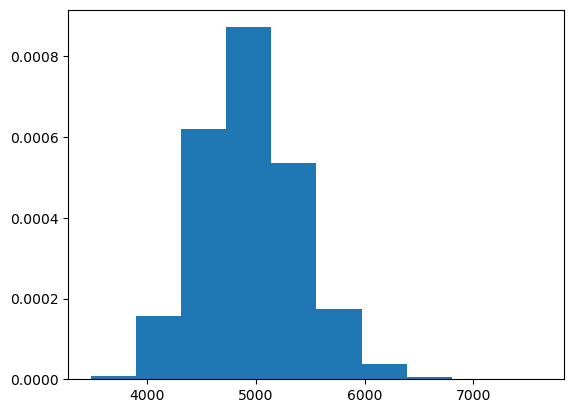

In [162]:
from matplotlib import pyplot as plt

start_dt = df_daily['Date'].iloc[125] + timedelta(days=1)
res_list = []

for i in range(10000):
    cur = start_dt
    idx_val = df_daily['Open'].iloc[126]
    while cur <= date.today():
        if cur.isoweekday() > 5:
            cur+=timedelta(days=1)
            continue
        #dS = u * S * dt + sigma * S * dW
        delta = est_mu * idx_val  + est_sigma * idx_val * stats.norm.rvs()
        idx_val += delta
        cur+=timedelta(days=1)
    res_list.append(idx_val)
    if i % 1000 == 0:
        print(i)


plt.hist(res_list, density=True)
